在了解线性函数前，先来了解一下线性回归和逻辑回归的区别。

线性回归为**估值而生**，逻辑回归为**分类而生**。

比如我们根据根据一家企业的运营质量、盈利、运营时间等来对企业进行估值，这属于估值问题，如果存在线性关系，属于线性回归问题。

再比如我们对验证码图片进行识别，将图片通过线性函数也产生了一列值，但是我们的目的是为了识别图片中究竟是数字0、1、2、3、4、5、6、7、8、9中的几。

所以我们还需要将线性函数产生的这一列值进行非线性变换，变换之后的结果能用来让我们分类。

这是分类问题，是逻辑回归问题。

> 在今后的文章中，数据的组成形式存在两种可能。

> 1、样本数据集，每列代表一个对象。也就是说一个待测对象是一个列向量

> 2、样本数据集，每行代表一个对象。也就是说待测对象是一个行向量

# 线性函数

我们先在数学上理解线性函数。

在线性模型中，当我们想把待测对象x向量转化为数值结果y向量的时候，我们会推导出一个函数 Y=WX+B。这个就是线性函数。

其中x为输入对象，x1、x2、x3为对象的特征属性，y是输出结果，y1、y2是结果的分量。

权重W确定x在预测每个y的分量时的影响。而输出结果有几个分量这是要看场景的目的。

比如验证码，我如果想要每张验证码具体的值，值输出结果是1维的，如果想要输出验证码图片属于每个数字的概率，则验证码是10维的。

![这里写图片描述](https://img-blog.csdnimg.cn/img_convert/359b388e9ce24ece2260c9d12eb07910.png)

1、在很多线性回归模型中根本看不到B的存在，而仅写成Y=WX，从上图中也可以看出，这是因为B可以看成是输入对象一个值为1的属性所对应的权重。

即`y1=W11*X1+W21*X2+W31*X3+1*B1`，这里Y的每个分量由输入对象每个属性线性组合得出。

![这里写图片描述](https://img-blog.csdnimg.cn/img_convert/528898db04709dd793a30a957983ac90.png)

2、我们可以这样理解线性函数，权重w的某一行表示输入对象每个属性对输出分量的贡献率。

比如w11表示待测样本属性x1对分量y1的贡献率，w21表示待测样本属性x2对分量y1的贡献率，w12表示待测样本属性x1对分量y2的贡献率。

如果我们不需要预测Y2分量，权重矩阵就不存在W12，W22，W32。我们所以如果我们想要预测的结果不需要那么多分量，只是减少了权重矩阵的维度。

![这里写图片描述](https://img-blog.csdnimg.cn/img_convert/8f161875f5260c8b2ab6bcea35e322c4.png)

3、对于线性二分类，就是找到一个直接或平面超平面将两个集合分割开。

因此我们可以通过判断g(x)>0或g(x)<0进行判别。则分割面或分割线满足WX=0。所以他还是一个线性问题。

![这里写图片描述](https://img-blog.csdnimg.cn/img_convert/840ffae24b027e7821ce6ac36e249a75.png)

----------


在线性函数的相关教程中比较容易混淆的就是行向量和列向量。有时你也会看到如下的写法。(你会看到Y=WX和Y=XW等不同的写法，但是表达的思想是相同的 。)

![这里写图片描述](https://img-blog.csdnimg.cn/img_convert/081c801f612695dfa3618191a3a291ac.png)

![这里写图片描述](https://img-blog.csdnimg.cn/img_convert/5c01fa3c390349766c3e75e775b45bf9.png)

不论哪种写法，其中的x始终为一个输入对象，各分量为该对象的特征属性。

只不过有些地方是以行向量的形式存在，有时是以列向量的形式存在。

X是多个对象形成的样本数据集，只不过有时对象按列存在，有时按行存在。

> 当使用Y=WX时，X每列为一个对象，Y的每行为该对象的输出结果。当使用Y=XW时，X的每行为一个对象，Y的每列为该对象的输出结果。
	> 甚至有时你会看到$Y=W^TX$或者$Y=WX^T$等各种形式的形式。


为什么看到的教程中输出结果y都是一个值，而不是向量？
--------------------------

我们知道输出一个值的结果时，y是对象每个属性的线性组合。

当输出结果为向量y时，y的每个分量，是对象每个属性的线性组合。

而对象属性组合成y 的每个分量时的权重系数是相互独立的。

所以在输出结果为向量时，也就是先求出组合成y的第一个分量的系数，再求出第2个分量的组合系数。

只是多做了几遍求解罢了。所以你看教程中看到的基本都是输出单个值y的情况。

当输出结果y为向量时，是使用矩阵同时对多组系数进行求解，而不是使用向量一个分量一个分量的求解。

# 线性回归

对于一个的拥有m个对象，n个属性的样本数据集而言，线性回归的目的就是建立一个线性函数。

能对待测对象x，预测其对应的一个或者多个输出结果。

比如输入对象为一个富二代，属性为年龄、零花钱、运动时间，预测结果为身高，预测结果也可以为身高、体重。

而在我们平时看到的教程中，基本以预测一维数据为主，因为对于二维结果，我们可以分两次预测一维结果来形成。

所以下面的教程我们就以预测一维结果为例继续讲解。


如果预测的结果为一维的，即Y为一个数值，则Y=WX，其中W为[b1，w11，w12，w13]的行向量，X为[1，x1，x2，x3]列向量，公式展开便可以写成如下线性组合的样式，这也就是最简单的线性回归模型。

> $$ y=b1*1+w11*x1+w12*x2+w13*x3 $$

**注：此处的X在原来x的基础上，左边又加了一列，且全是1。以此来代表B向量**

这个就是一个组合问题，已知一些数据，如何求里面的未知参数，给出一个最优解。 

寻找最优回归系数就是一种优化问题，我们在之前讲过一种优化问题。

>参考：http://blog.csdn.net/luanpeng825485697/article/details/78765923

在今后的逻辑回归，SVM和神经网络，都是优化问题，都是问了使损失函数最小的题解。

只不过在那篇文章中优化问题处理的自变量为离散值的情况，线性回归问题中的自变量取值是连续值。

在线性回归中的损失函数时误差平方和。后面我们会看到其他损失函数。

> 为什么求解权重W，是求使误差平方和最小的矩阵，而不是直接数学运算呢？

这是因为一个线性矩阵方程，直接求解，很可能无法直接求解。有唯一解的数据集，微乎其微。基本上不存在这样一个权重矩阵满足你搜集的所有样本对象的输入输出关系。

因此，需要退一步，将参数求解问题，转化为求最小误差问题，即求出一个权重矩阵，使得对样本数据集中的对象进行预测，预测的结果与真实结果之间的误差尽可能小。

如果样本数据集中包含m个对象，每次预测只输出一个值，则会进行m次预测，会有m个预测结果，也就会有m个预测结果的误差。

----------

> 上面的教程我们知道了线性回归的目的。那么反应在数学上是什么问题呢？



求一个最优权值矩阵，直观上，就是使用这个权值矩阵进行预测的结果误差最小。

对于包含m个对象的样本数据集，每个对象预测产生一个数值，则样本数据集就会产生m个预测值，就会产生m个误差值。

一般我们采用使m个误差值的平方和最小的权值矩阵为最优权值矩阵。


（若X每列为一个对象，w为行向量，则误差平方和为）

$\sum_{i=1}^{m}(y_i-wx_i)^2$

（若X每行为一个对象，w为列向量，则误差平方和为）

$\sum_{i=1}^{m}(y_i-x_iw)^2$

这个误差平方和，被称为损失函数或者错误函数或者成本函数，它用来描述线性函数不好的程度。

从下图来直观理解一下线性回归优化的目标——图中线段距离（平方）的平均值，也就是最小化到分割面的距离和。 

![这里写图片描述](https://img-blog.csdnimg.cn/img_convert/27428226d0859f8726afb015180570da.png)

# 线性回归中为什么一般选用误差平方和作为损失函数？


上面我教程中，我们使用误差平方和作为损失函数，用来评估模型预测结果，那么我们为啥一般选误差平方和作为损失函数呢？

假设模型结果与测量值 误差满足，均值为0的高斯分布，即正态分布。这个假设是靠谱的，符合一般客观统计规律。

数据x与y的条件概率：

$$p(y^{(i)}|x^{(i)};\theta)=\frac{1}{\sqrt{2\pi}\sigma}exp(-\frac{(y^{(i)}-\theta^Tx^{(i)})^2}{2\sigma^2})$$

若使 模型与测量数据最接近，那么其概率积就最大。

概率积，就是概率密度函数的连续积，这样，就形成了一个最大似然函数估计敲打。对最大似然函数估计进行推导，就得出了求导后结果： 平方和最小公式。


> 也就是说选用误差平方和作为误差函数，其实就是将误差假定为了0均值的高斯正态分布。

>这也就是为什么还会存在sigmoid逻辑回归（以伯努利分布分析误差），以及softmax等一般线性回归（以指数分布分析误差）。


# 除了误差平方和还有哪些损失函数


线性回归中采用平方和的形式，一般都是由模型条件概率的最大似然函数 概率积最大值，求导，推导出来的。

统计学中，损失函数一般有以下几种：

1） 0-1损失函数

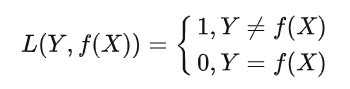

2） 平方损失函数

$L(Y,f(X))=(Y−f(X))^2$

3） 绝对损失函数

$L(Y,f(X))=|Y−f(X)|$

4） 对数损失函数

$L(Y,P(Y|X))=−logP(Y|X)$

损失函数越小，模型就越好，而且损失函数 尽量 是一个凸函数，便于收敛计算。

线性回归，采用的是平方损失函数。而逻辑回归采用的是 对数 损失函数。

# 模型求解


接下来，我们就以误差平方和作为损失函数，以损失函数最小为目的来求解权重矩阵。有最小二乘法，梯度下降法、随机梯度下降法。

## 最小二乘法 ##

我们的目的是求使损失函数最小的权重矩阵W。首先想到的就是数学中的求导。

导数等于0的地方是极大值或极小值。最小二乘就是对损失函数求导，使导出等于0。（我们先暂且把他认为是最大值、最小值吧）

下面的公式还是以每个对象只预测一个数值结果为例。

有两种写法：

y=wx，其中w为横向量，x为列向量，y为数值。

y=xw，其中w为列向量，x为横向量，y为数值。

1、若用X表示多个样本对象，每行为一个对象。则要写成y=Xw，其中w为列向量，x为矩阵，y为列向量，每个分量表示每个对象的预测结果。

此时误差平方和对权重矩阵w求导，为下面的公式。


![这里写图片描述](https://img-blog.csdnimg.cn/img_convert/e0c7b67e7c2141deeb3f13e940e755fb.png)

令上述公式等于0，得到：

$w=(X^TX)^{-1}X^Ty$

这是当前可以估计出的w的最优解。从现有数据上估计出的w可能并不是数据中的真实w值，仅是w的一个最佳估计。

值得注意的是，上述公式中包含逆矩阵，也就是说，这个方程只在逆矩阵存在的时候使用，也即是这个矩阵是一个方阵，并且其行列式不为0。

也就是说最小二乘方法是一个直接的数学求解公式，不过它要求X是列满秩的。


2、若用X表示多个样本对象，每列为一个对象。则y=wX中，w为横向量，x为矩阵，y为横向量，每个分量表示每个对象的预测结果。

此时误差平方和对权重矩阵w求导，为下面的公式。

$$\frac{d (y-wX)^T(y-wX)}{d w}$$

上式等于0，得到下面的公式。

$w=y^TX^T(XX^T)^{-1}$

## 梯度下降法 ##

在梯度下降法和随机梯度下降法中，我们使用Y=XW的形式，是为了方便公式推导。X每行为一个样本对象。当每个对象仅预测一个值时，W为列向量。

分别有梯度下降法，批梯度下降法，增量梯度下降。本质上，都是偏导数，步长/最佳学习率，更新，收敛的问题。

这个算法只是最优化原理中的一个普通的方法，可以结合最优化原理来学，就容易理解了。

所谓梯度也就是导数。只不过是多维空间下的导数。

例如上面对权重矩阵w的求导就是w的梯度。

我们知道线性回归的损失函数为：（其中$x_i$为一个样本对象，行向量）

$J(w)=\sum_{i=1}^m(x_iw-y_i)^2$

对w求导的导数为（X一行为一个对象，w为列向量）

$\frac{d J(w)}{d w} = 2X^T(Xw-y)$

上面这个导数就是w的梯度。

$\nabla J(w)=2X^T(Xw-y)$

而所谓的梯度更新，就是在原有形式上变化一个梯度的值。其中k表示第几次迭代，其中$\rho$是学习速率。

$w_{k+1}=w_k-\rho * \nabla J(w_k)=w_k-\rho * 2X^T(Xw_k-y)$


> 画外音：还有一种算法叫做梯度上升法，就是将公式中的减号换成加号。

可以在下图中形象的理解梯度下降法。

![这里写图片描述](https://img-blog.csdnimg.cn/img_convert/8371b98d6065b2ed9343dc094819914e.png)

从上面的图可以看出：初始点不同，获得的最小值也不同，因此梯度下降求得的只是局部最小值；

注意：下降的步伐大小非常重要，因为如果太小，则找到函数最小值的速度就很慢，如果太大，则可能出现权值矩阵求解不再收敛；

![这里写图片描述](https://img-blog.csdnimg.cn/img_convert/a38deb2f12a5ba21c651707e06deef5a.png)

## 随机梯度下降法 ##


随机梯度下降法，也称为在线学习算法，它不像上面的梯度下降法，每次迭代都使用了全部的数据集，这里每次迭代仅仅使用一个样本，这种方法在神经网络中使用的较多：

（其中$x_k$为第k个样本对象，为行向量。$y_k$为该对象产生的预测输出数值。$w_k$为迭代第k次产生的权重列向量w，当对新的一行对象进行预测时，总是使用最新的w。$\rho_k$ 为第k次迭代是使用的学习速度（也叫变化步长），每次迭代是使用的学习速度都不相同。刚开始学习速度快（步长大），越到后面，速度越慢（步长越短））

$w_{k+1}=w_k-2*\rho_kx_k^T(x_kw_k-y_k)$

这里需要说明的是，$\rho_k$ 必须满足两个条件：

$\displaystyle\sum_{k=1}^{\infty} \rho_k \to\infty$

$\displaystyle\sum_{k=1}^{\infty} \rho_k^2 < \infty$


这个过程，其实是根据新的输入样本，对$w$的一个不断的修正的过程，一般来说，我们会把$\rho_k$ 后面的式子称为修正量。

折两个条件，保证了在迭代过程中估计的修正值，会趋近于零。因此，对于足够大的k而言，迭代会突然停止，但是，由于有第一个条件的存在，这个停止不会发生的太早，并且不会再离结果非常远的时候，就停止了迭代。

上面的第二个条件保证了，对于变量的随机性噪声，噪声的累积保持有限。


**去均值和归一化**

此种方法应用于梯度下降，为了加快梯度下降的执行速度；

思想：将各个特征属性的值标准化，使得取值范围大致都在-1<=x<=1之间；

没有经过归一化，寻找最优解的过程：

![这里写图片描述](https://img-blog.csdnimg.cn/img_convert/bb716614a9c14f9d11eedfadaa6ae1e6.png)

经过归一化，把各个特征的尺度控制在相同的范围内：

![这里写图片描述](https://img-blog.csdnimg.cn/img_convert/4dfcbc1db537c7a832a6b8180a2842e1.png)


----------


> 梯度下降和随机梯度下降的感想

通过误差不断调整权重主要有两个途径，一个是迭代次数，一个是样本数量。

以下图为例，假设只存在样本1和样本2，其中样本1会倾向于权重矩阵向左侧移动，样本2会倾向于权重矩阵向左侧移动。

权重矩阵w的初始值在O1处，先使用样本1调整，w调整到O2处，再使用样本2调整，w调整到O3处。

第一次迭代结束，开始进行第二次迭代，使用样本1调整，w调整到O4处，使用样本2调整，w调整到O5处，开始第三次迭代，使用样本1调整到O6处，使用样本2调整到O7处，结束。

![这里写图片描述](https://img-blog.csdnimg.cn/img_convert/a66262da8ea1ca91d29c33b810b52582.png)

在这个过程我们理解到由于学习速率的存在同一个样本要迭代多次，才能充分发挥样本的作用，遍历每一个样本，才能充分利用每一个样本携带的信息。

----------